In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

In [41]:
# Load the dataset
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\Decision Tree & Naive Bayes Classification\pima-indians-diabetes.csv')

df.head()


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
print(df.columns)


Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', ' Age (years)',
       ' Class variable (0 or 1)'],
      dtype='object')


In [43]:
print(df.dtypes)

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
 Age (years)                                                                  int64
 Class variable (0 or 1)                                                      int64
dtype: object


In [36]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Handle missing values if any
# For simplicity, we'll fill missing values with the mean (can be improved depending on your needs)
data.fillna(data.mean(), inplace=True)

# Check if there are any categorical variables that need encoding (optional)
# In this case, all columns are numerical, so we don't need encoding.

# Remove outliers (optional, depending on domain knowledge, here we simply check for extreme values)
# This is just an example, and you may want to apply domain-specific rules
data = data[(data >= 0).all(axis=1)]  # Remove negative values if any

print("\nCleaned Data:")
print(data.describe())



Missing values in each column:
Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

Cleaned Data:
       Number of times pregnant  \
count                768.000000   
mean                   3.845052   
std                    3.369578   
min                    0.000000   
25%                    1.000000   
50%                    3.000

In [44]:
data.columns = data.columns.str.strip()

# Verify the column names after cleaning
print("Column names after cleaning:")
print(data.columns)

Column names after cleaning:
Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')


In [46]:

# Define features (X) and target variable (y)
X = data.drop('Class variable (0 or 1)', axis=1)  # Features (all columns except target)
y = data['Class variable (0 or 1)']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape[0]} samples, Test Set: {X_test.shape[0]} samples")


Training Set: 614 samples, Test Set: 154 samples


In [47]:

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)


In [48]:


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 74.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
[[75 24]
 [15 40]]


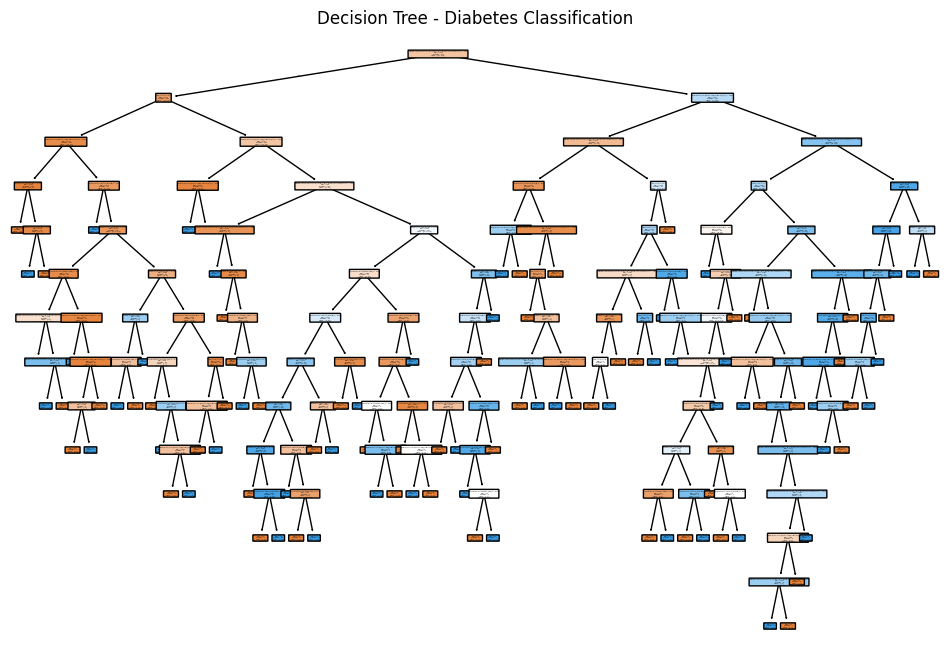

In [55]:


# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title("Decision Tree - Diabetes Classification")
plt.show()


In [49]:


# Pick a random sample from the test set
random_sample = X_test.sample(1, random_state=42)
predicted_class = dt_classifier.predict(random_sample)

# Display the prediction
print(f"\nRandom Sample Prediction: {'Diabetes' if predicted_class[0] == 1 else 'No Diabetes'}")



Random Sample Prediction: No Diabetes
